In [1]:
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/content/Sentiment.csv")
print("Dataset Shape:", df.shape)
print(df.head())

Dataset Shape: (13871, 3)
   id sentiment                                               text
0   1   Neutral  RT @NancyLeeGrahn: How did everyone feel about...
1   2  Positive  RT @ScottWalker: Didn't catch the full #GOPdeb...
2   3   Neutral  RT @TJMShow: No mention of Tamir Rice and the ...
3   4  Positive  RT @RobGeorge: That Carly Fiorina is trending ...
4   5  Positive  RT @DanScavino: #GOPDebate w/ @realDonaldTrump...


Data Cleaning

In [3]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+|www\S+", "", text)
    text = re.sub(r"@\w+", "", text)
    text = re.sub(r"#", "", text)
    text = re.sub(r"[^\w\s]", " ", text)
    text = re.sub(r"\d+", "", text)
    text = re.sub(r"\s+", " ", text).strip()
    return text

df["clean_text"] = df["text"].apply(clean_text)

Train-Test Split

In [4]:
X = df["clean_text"]
y = df["sentiment"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

Feature Extraction (TF-IDF)

In [5]:
vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1,2))
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

model 1: Logistic Regression

In [6]:
model_lr = LogisticRegression(max_iter=200, class_weight="balanced")
model_lr.fit(X_train_tfidf, y_train)

LogisticRegression(class_weight='balanced', max_iter=200)

Model Evaluation

In [7]:
y_pred = model_lr.predict(X_test_tfidf)

print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred))

✅ Accuracy: 0.6313513513513513

📊 Classification Report:
               precision    recall  f1-score   support

    Negative       0.81      0.68      0.74      1699
     Neutral       0.42      0.52      0.47       629
    Positive       0.46      0.60      0.52       447

    accuracy                           0.63      2775
   macro avg       0.57      0.60      0.58      2775
weighted avg       0.67      0.63      0.64      2775



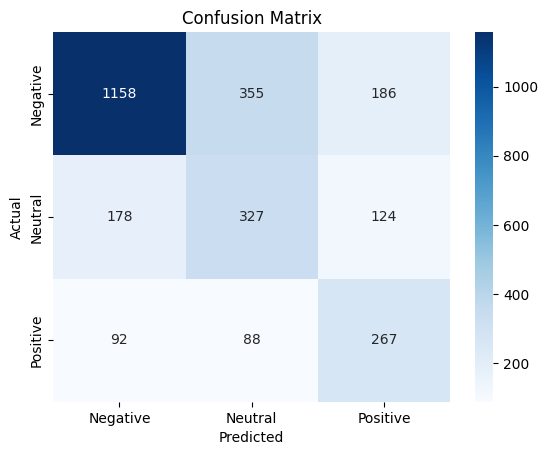

In [8]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=["Negative", "Neutral", "Positive"])
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Negative","Neutral","Positive"],
            yticklabels=["Negative","Neutral","Positive"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Predictions

In [9]:
sample_texts = [
    "I really love this product, it's amazing!",
    "Worst experience ever, totally disappointed.",
    "It was okay, nothing special but not bad."

]

sample_clean = [clean_text(t) for t in sample_texts]
sample_tfidf = vectorizer.transform(sample_clean)
predictions = model_lr.predict(sample_tfidf)

for text, pred in zip(sample_texts, predictions):
    print(f"Text: {text} -> Sentiment: {pred}")

Text: I really love this product, it's amazing! -> Sentiment: Positive
Text: Worst experience ever, totally disappointed. -> Sentiment: Negative
Text: It was okay, nothing special but not bad. -> Sentiment: Negative


Model 2 : MultinomialNB

In [10]:
from sklearn.naive_bayes import MultinomialNB
model_MNB = MultinomialNB()
model_MNB.fit(X_train_tfidf, y_train)

MultinomialNB()

✅ Accuracy: 0.6605405405405406

📊 Classification Report:
               precision    recall  f1-score   support

    Negative       0.69      0.90      0.78      1699
     Neutral       0.46      0.25      0.32       629
    Positive       0.64      0.32      0.42       447

    accuracy                           0.66      2775
   macro avg       0.60      0.49      0.51      2775
weighted avg       0.63      0.66      0.62      2775



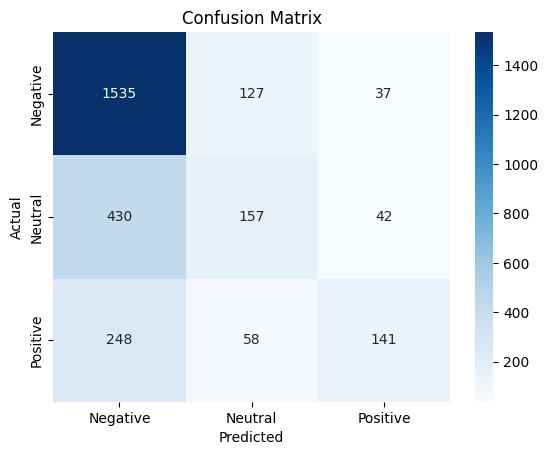

In [11]:
y_pred_MNB = model_MNB.predict(X_test_tfidf)

print("✅ Accuracy:", accuracy_score(y_test, y_pred_MNB))
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred_MNB))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_MNB, labels=["Negative", "Neutral", "Positive"])
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Negative","Neutral","Positive"],
            yticklabels=["Negative","Neutral","Positive"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [12]:
sample_texts = [
    "I really love this product, it's amazing!",
    "Worst experience ever, totally disappointed.",
    "It was okay, nothing special but not bad."
]

sample_clean = [clean_text(t) for t in sample_texts]
sample_tfidf = vectorizer.transform(sample_clean)
predictions = model_MNB.predict(sample_tfidf)

for text, pred in zip(sample_texts, predictions):
    print(f"Text: {text} -> Sentiment: {pred}")

Text: I really love this product, it's amazing! -> Sentiment: Negative
Text: Worst experience ever, totally disappointed. -> Sentiment: Negative
Text: It was okay, nothing special but not bad. -> Sentiment: Negative


For those who wants extra marks: using TextBlob and SentimentAnalyser

In [13]:
from textblob import TextBlob

def sentiment(polarity):
    if blob.sentiment.polarity < 0:
        print("Negative")
    elif blob.sentiment.polarity > 0:
        print("Positive")
    else:
        print("Neutral")
blob = TextBlob("The movie was excellent!")
print(blob.sentiment)
sentiment(blob.sentiment.polarity)

blob = TextBlob("The movie was not bad.")
print(blob.sentiment)
sentiment(blob.sentiment.polarity)

blob = TextBlob("the bird is pink")
print(blob.sentiment)
sentiment(blob.sentiment.polarity)

Sentiment(polarity=1.0, subjectivity=1.0)
Positive
Sentiment(polarity=0.3499999999999999, subjectivity=0.6666666666666666)
Positive
Sentiment(polarity=-0.1, subjectivity=0.3)
Negative


In [14]:
# ============================================
# Sentiment Analysis using VADER
# ============================================

import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

# Download VADER lexicon (first time only)
nltk.download('vader_lexicon')

# 📂 Load Dataset
df = pd.read_csv("/content/Sentiment.csv")

# Initialize VADER
sid = SentimentIntensityAnalyzer()

# Apply sentiment analysis on 'text' column
df["scores"] = df["text"].apply(lambda x: sid.polarity_scores(str(x)))

# Extract individual scores
df["compound"] = df["scores"].apply(lambda s: s["compound"])
df["pos"] = df["scores"].apply(lambda s: s["pos"])
df["neu"] = df["scores"].apply(lambda s: s["neu"])
df["neg"] = df["scores"].apply(lambda s: s["neg"])

# Classify final sentiment
def sentiment_classify(c):
    if c >= 0.05:
        return "Positive"
    elif c <= -0.05:
        return "Negative"
    else:
        return "Neutral"

df["Predicted_Sentiment"] = df["compound"].apply(sentiment_classify)

# Show sample results
print(df[["text", "sentiment", "Predicted_Sentiment"]].head(10))

# Save results
output_path = "/content/Sentiment_VADER_Result.csv"
df.to_csv(output_path, index=False)
print(f"✅ Results saved as {output_path}")


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


                                                text sentiment  \
0  RT @NancyLeeGrahn: How did everyone feel about...   Neutral   
1  RT @ScottWalker: Didn't catch the full #GOPdeb...  Positive   
2  RT @TJMShow: No mention of Tamir Rice and the ...   Neutral   
3  RT @RobGeorge: That Carly Fiorina is trending ...  Positive   
4  RT @DanScavino: #GOPDebate w/ @realDonaldTrump...  Positive   
5  RT @GregAbbott_TX: @TedCruz: "On my first day ...  Positive   
6  RT @warriorwoman91: I liked her and was happy ...  Negative   
7  Going on #MSNBC Live with @ThomasARoberts arou...   Neutral   
8  Deer in the headlights RT @lizzwinstead: Ben C...  Negative   
9  RT @NancyOsborne180: Last night's debate prove...  Negative   

  Predicted_Sentiment  
0             Neutral  
1            Positive  
2            Positive  
3             Neutral  
4             Neutral  
5            Negative  
6            Positive  
7             Neutral  
8             Neutral  
9             Neutral  
✅ Results